<a href="https://colab.research.google.com/github/Iamfouzia/AI_Machine_Learning_projects/blob/main/Traffic_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Core libraries
import pandas as pd
import numpy as np

# Preprocessing, train-test split, scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/traffic.csv")
df.head()


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
df.shape

(48120, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
print(df.columns)


Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [ ]:
# Check for missing values
print(df.isnull().sum())


Junction    0
Vehicles    0
hour        0
day         0
month       0
year        0
weekday     0
dtype: int64


DATA PREPROCESSING

 Feature Engineering

In [ ]:
# If 'DateTime' exists, extract features (skip if already done)
if 'DateTime' in df.columns:
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df['hour'] = df['DateTime'].dt.hour
    df['day'] = df['DateTime'].dt.day
    df['month'] = df['DateTime'].dt.month
    df['year'] = df['DateTime'].dt.year
    df['weekday'] = df['DateTime'].dt.weekday
    df.drop(['DateTime', 'ID'], axis=1, inplace=True)
else:
    # Already have features
    df = df.copy()

# Create classification label: High (1) vs Low (0) traffic
median_vehicles = df['Vehicles'].median()
df['Traffic_Label'] = np.where(df['Vehicles'] >= median_vehicles, 1, 0)

df.head()


,Junction,Vehicles,hour,day,month,year,weekday,Traffic_Label
0,1,15,0,1,11,2015,6,1
1,1,13,1,1,11,2015,6,0
2,1,10,2,1,11,2015,6,0
3,1,7,3,1,11,2015,6,0
4,1,9,4,1,11,2015,6,0


Graphs

Vehicles Distribution

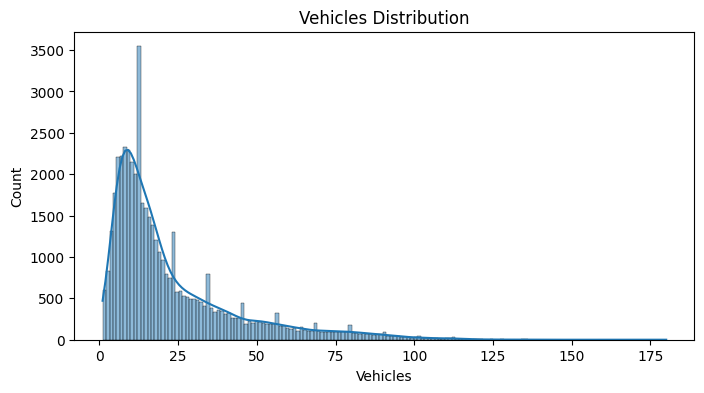

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Vehicles'], kde=True)
plt.title("Vehicles Distribution")
plt.show()


Vehicles per Hour

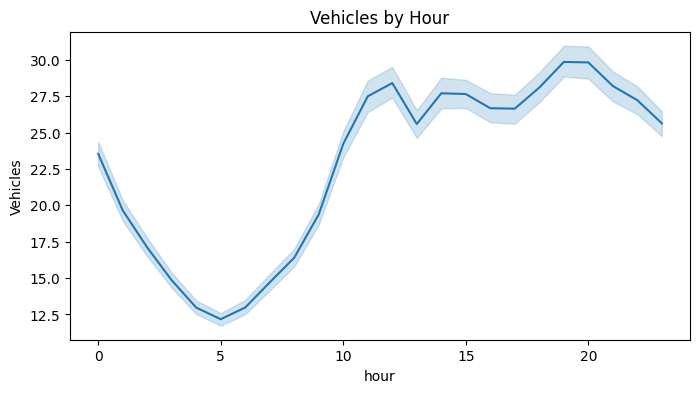

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df['hour'], y=df['Vehicles'])
plt.title("Vehicles by Hour")
plt.show()


Correlation Heatmap

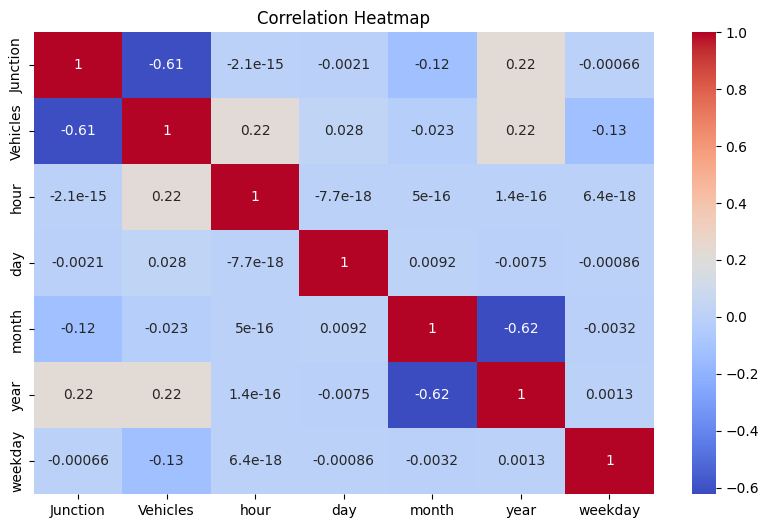

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Features and Targets

In [ ]:
# Features
X = df.drop(['Vehicles', 'Traffic_Label'], axis=1)

# Targets
y_reg = df['Vehicles']        # Regression
y_clf = df['Traffic_Label']   # Classification

print("Feature columns:", X.columns.tolist())


Feature columns: ['Junction', 'hour', 'day', 'month', 'year', 'weekday']


Feature Scaling

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Train-Test Split

In [ ]:
# Regression split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_reg, test_size=0.2, random_state=42
)

# Classification split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_scaled, y_clf, test_size=0.2, random_state=42
)

print("Regression train shape:", X_train_reg.shape, y_train_reg.shape)
print("Classification train shape:", X_train_clf.shape, y_train_clf.shape)


Regression train shape: (38496, 6) (38496,)
Classification train shape: (38496, 6) (38496,)


Regression Models

LINEAR REGRESSION

In [ ]:
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
pred_lr = lr.predict(X_test_reg)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, pred_lr))
r2_lr = r2_score(y_test_reg, pred_lr)
print("Linear Regression -> RMSE:", rmse_lr, "R2:", r2_lr)

Linear Regression -> RMSE: 12.772033686570563 R2: 0.5997395466491757


RANDOM FOREST REGRESSOR

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_reg, y_train_reg)
pred_rf = rf.predict(X_test_reg)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, pred_rf))
r2_rf = r2_score(y_test_reg, pred_rf)
print("Random Forest Regressor -> RMSE:", rmse_rf, "R2:", r2_rf)

Random Forest Regressor -> RMSE: 3.557166186892604 R2: 0.9689521963570167


XGBOOST REGRESSOR

In [ ]:
xgb_reg = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
pred_xgb = xgb_reg.predict(X_test_reg)
rmse_xgb = np.sqrt(mean_squared_error(y_test_reg, pred_xgb))
r2_xgb = r2_score(y_test_reg, pred_xgb)
print("XGBoost Regressor -> RMSE:", rmse_xgb, "R2:", r2_xgb)


XGBoost Regressor -> RMSE: 4.499761151226898 R2: 0.9503177404403687


Classification Model Comparison Table

In [ ]:
import pandas as pd

# Regression model comparison
regression_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor", "XGBoost Regressor"],
    "RMSE": [rmse_lr, rmse_rf, rmse_xgb],
    "R2 Score": [r2_lr, r2_rf, r2_xgb]
})

print("=== Regression Model Comparison ===")
regression_results


=== Regression Model Comparison ===


,Model,RMSE,R2 Score
0,Linear Regression,12.772034,0.599740
1,Random Forest Regressor,3.557166,0.968952
2,XGBoost Regressor,4.499761,0.950318


Linear Regression: Predicted vs Actual

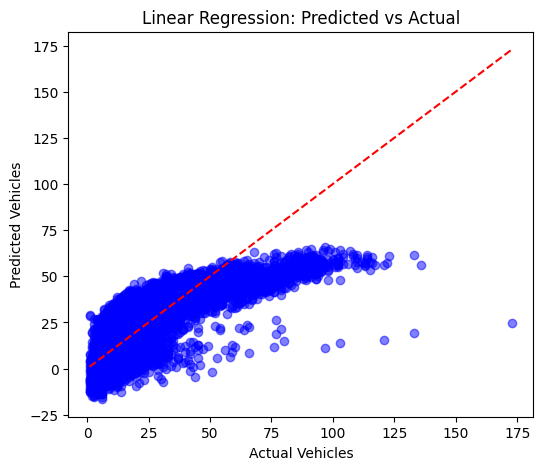

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(y_test_reg, pred_lr, alpha=0.5, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Actual Vehicles")
plt.ylabel("Predicted Vehicles")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()


Random Forest Regressor: Predicted vs Actual

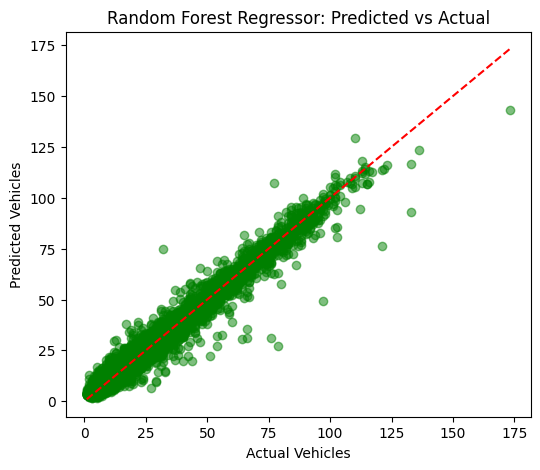

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(y_test_reg, pred_rf, alpha=0.5, color='green')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Actual Vehicles")
plt.ylabel("Predicted Vehicles")
plt.title("Random Forest Regressor: Predicted vs Actual")
plt.show()


XGBoost Regressor: Predicted vs Actual

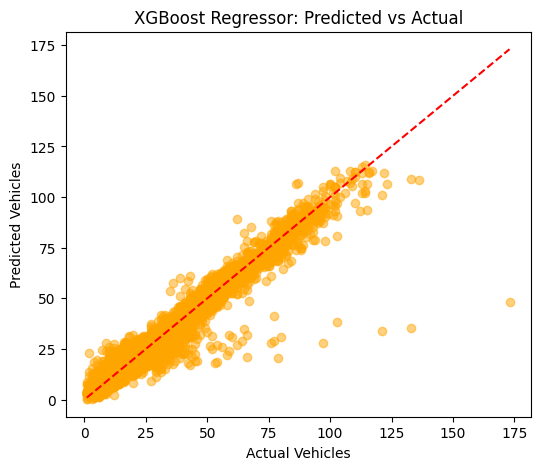

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(y_test_reg, pred_xgb, alpha=0.5, color='orange')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Actual Vehicles")
plt.ylabel("Predicted Vehicles")
plt.title("XGBoost Regressor: Predicted vs Actual")
plt.show()


Classification Models

In [ ]:
# --- Logistic Regression ---
log_clf = LogisticRegression()
log_clf.fit(X_train_clf, y_train_clf)
pred_log = log_clf.predict(X_test_clf)
acc_log = accuracy_score(y_test_clf, pred_log)
f1_log = f1_score(y_test_clf, pred_log)

# --- Random Forest Classifier ---
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
pred_rf_clf = rf_clf.predict(X_test_clf)
acc_rf_clf = accuracy_score(y_test_clf, pred_rf_clf)
f1_rf_clf = f1_score(y_test_clf, pred_rf_clf)

# --- XGBoost Classifier ---
xgb_clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42,
                            use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_clf, y_train_clf)
pred_xgb_clf = xgb_clf.predict(X_test_clf)
acc_xgb_clf = accuracy_score(y_test_clf, pred_xgb_clf)
f1_xgb_clf = f1_score(y_test_clf, pred_xgb_clf)

# Print classification results
print("Logistic Regression -> Accuracy:", acc_log, "F1 Score:", f1_log)
print("Random Forest Classifier -> Accuracy:", acc_rf_clf, "F1 Score:", f1_rf_clf)
print("XGBoost Classifier -> Accuracy:", acc_xgb_clf, "F1 Score:", f1_xgb_clf)


Logistic Regression -> Accuracy: 0.8222152950955943 F1 Score: 0.8307448807992878
Random Forest Classifier -> Accuracy: 0.9270573566084788 F1 Score: 0.9299820466786356
XGBoost Classifier -> Accuracy: 0.9279925187032418 F1 Score: 0.9312158808933002


Classification Model Comparison Table

In [ ]:
import pandas as pd

# Classification model comparison
clf_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest Classifier", "XGBoost Classifier"],
    "Accuracy": [acc_log, acc_rf_clf, acc_xgb_clf],
    "F1 Score": [f1_log, f1_rf_clf, f1_xgb_clf]
})

print("=== Classification Model Comparison ===")
clf_results


=== Classification Model Comparison ===


,Model,Accuracy,F1 Score
0,Logistic Regression,0.822215,0.830745
1,Random Forest Classifier,0.927057,0.929982
2,XGBoost Classifier,0.927993,0.931216


Logistic Regression Confusion Matrix

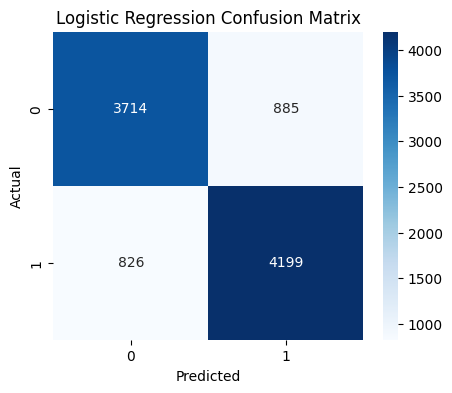

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
cm_log = confusion_matrix(y_test_clf, pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Classifier Confusion Matrix

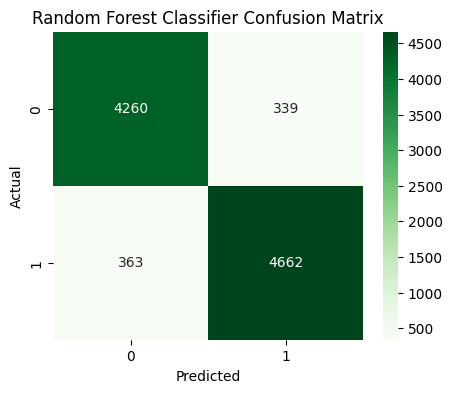

In [ ]:
# Random Forest Classifier
cm_rf = confusion_matrix(y_test_clf, pred_rf_clf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XGBoost Classifier Confusion Matrix

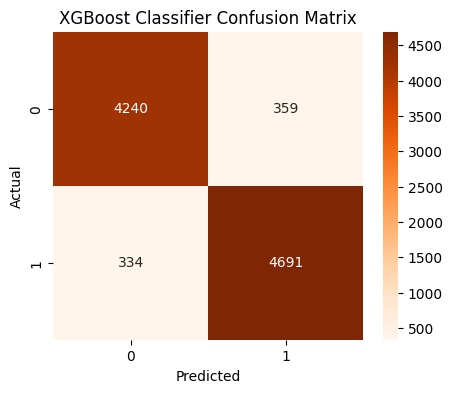

In [ ]:
# XGBoost Classifier
cm_xgb = confusion_matrix(y_test_clf, pred_xgb_clf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges")
plt.title("XGBoost Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Bar Plot Visualization for Accuracy

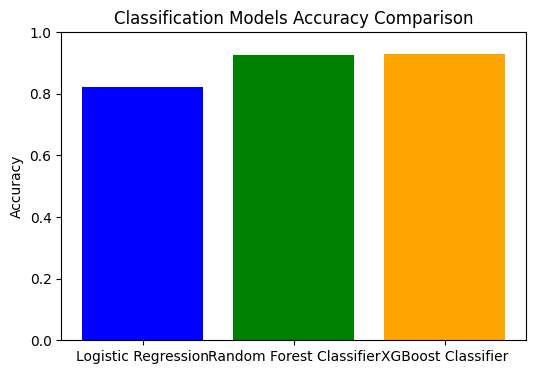

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(clf_results["Model"], clf_results["Accuracy"], color=['blue','green','orange'])
plt.title("Classification Models Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


Bar Plot Visualization for F1 Score

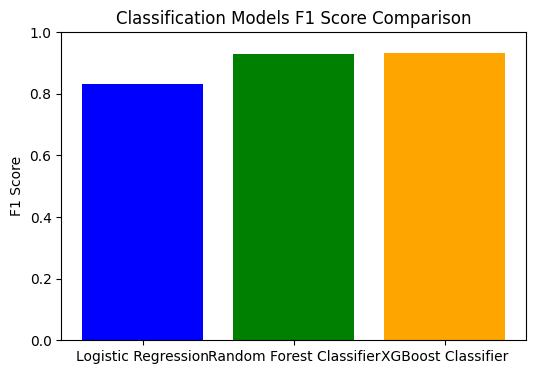

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(clf_results["Model"], clf_results["F1 Score"], color=['blue','green','orange'])
plt.title("Classification Models F1 Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0,1)
plt.show()


Combined Model Comparison Table

In [ ]:
import pandas as pd

# Combined comparison table
combined_results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest Regressor",
        "XGBoost Regressor",
        "Logistic Regression",
        "Random Forest Classifier",
        "XGBoost Classifier"
    ],
    "Type": [
        "Regression",
        "Regression",
        "Regression",
        "Classification",
        "Classification",
        "Classification"
    ],
    "RMSE": [rmse_lr, rmse_rf, rmse_xgb, "-", "-", "-"],
    "R2 Score": [r2_lr, r2_rf, r2_xgb, "-", "-", "-"],
    "Accuracy": ["-", "-", "-", acc_log, acc_rf_clf, acc_xgb_clf],
    "F1 Score": ["-", "-", "-", f1_log, f1_rf_clf, f1_xgb_clf]
})

combined_results


,Model,Type,RMSE,R2 Score,Accuracy,F1 Score
0,Linear Regression,Regression,12.772034,0.59974,-,-
1,Random Forest Regressor,Regression,3.557166,0.968952,-,-
2,XGBoost Regressor,Regression,4.499761,0.950318,-,-
3,Logistic Regression,Classification,-,-,0.822215,0.830745
4,Random Forest Classifier,Classification,-,-,0.927057,0.929982
5,XGBoost Classifier,Classification,-,-,0.927993,0.931216
